In [1]:
#importing important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading csv data set file
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The factors that might affect the health insurance cost are:-

Age: Age of the beneficiary,
Sex: Gender of the beneficiary,
BMI: Body Mass Index (kg / m^2).
Children: Number of childrens,
Smoker: Does smoke or not,
Region: Residential area of the beneficiary,

In [4]:
#size of data ie Columns and rows
df.shape

(1338, 7)

In [5]:
#datatype of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#to check any null value in data 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#charges is our target variable
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

This shows a brief description of the Charges column.
Few observations:-

The minimum cost of an insurance is 1122  ,
Around 75% of the charges are below 17,000  ,
The maximum cost of an insurance is 63770  ,

EDA Techniques

analyzing the medical insurance charges by age, bmi and children according to the smoking factor

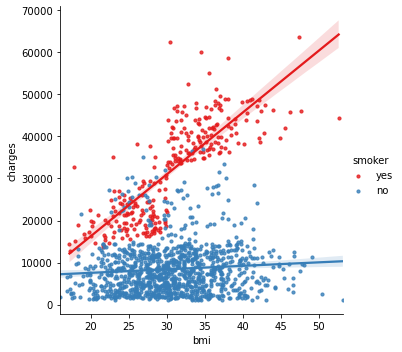

In [8]:
#visualizing bmi and charges relation with smoker factor help seaborn 
sns.lmplot( x='bmi',y='charges', data=df, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

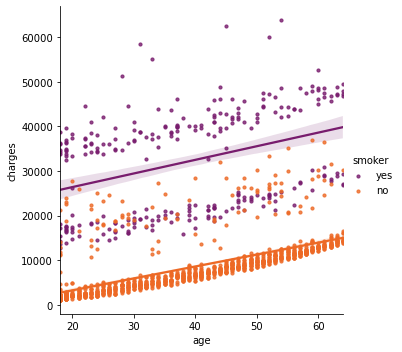

In [9]:
#visualizing age and charges relation with smoking factor
sns.lmplot(x='age', y='charges', hue='smoker', data=df, palette='inferno', scatter_kws={"s": 10})
plt.show()

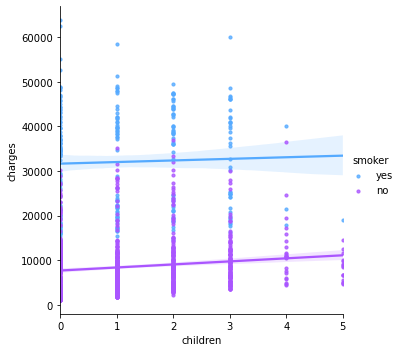

In [10]:
#visualizing bmi and charges relation with smoker factor help seaborn 
sns.lmplot(x='children', y='charges', hue='smoker', data=df, palette='cool', scatter_kws={"s": 10})
plt.show()

Smoking has the highest impact on the medical insurance costs, even though costs are increasing with age, bmi and children. Also people with children tend to smoke less.

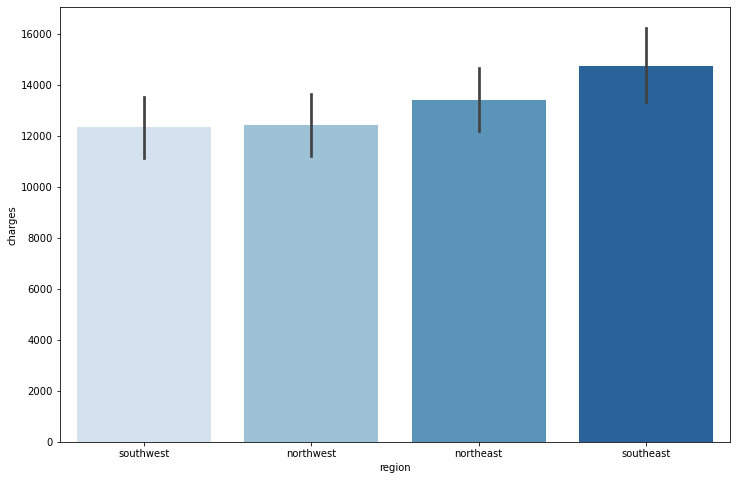

In [11]:
f, axs = plt.subplots(1,1, figsize=(12,8))
plot_order = df.groupby('region')['charges'].sum().sort_values(ascending=True).index.values
sns.barplot(x='region', y='charges', data=df, palette='Blues', order=plot_order)
plt.show()

So overall the highest medical insurance charges are in the "Southeast" and the lowest are in the "Southwest". Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

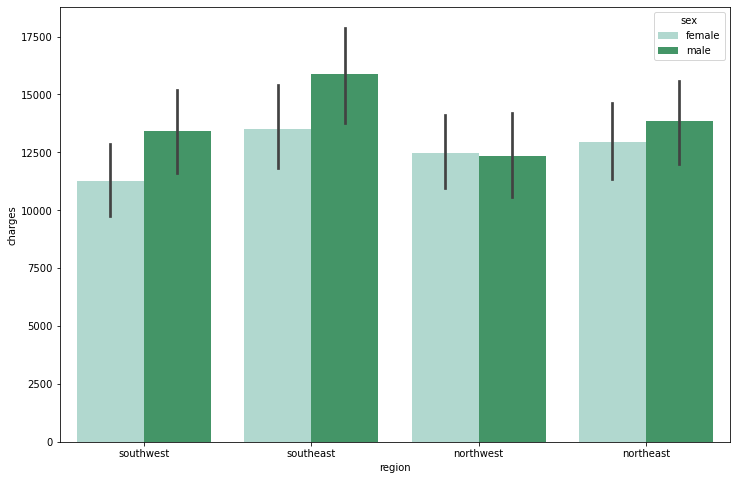

In [12]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='BuGn')
plt.show()

So overall the highest medical insurance charges are in the "Southeast". Taking into account certain factors (male, female) let's see how it changes by region

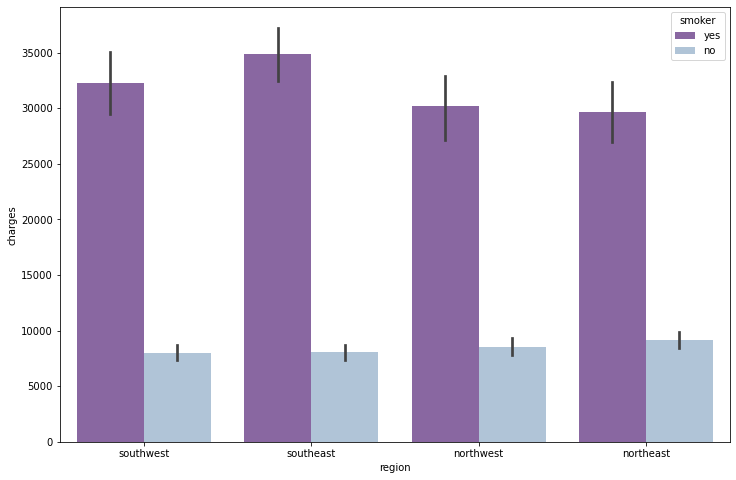

In [13]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='BuPu_r')
plt.show()

So overall the highest medical insurance charges are in the "Southeast" and the lowest are in the "northeast". Taking into factor smoking let's see how it changes by region

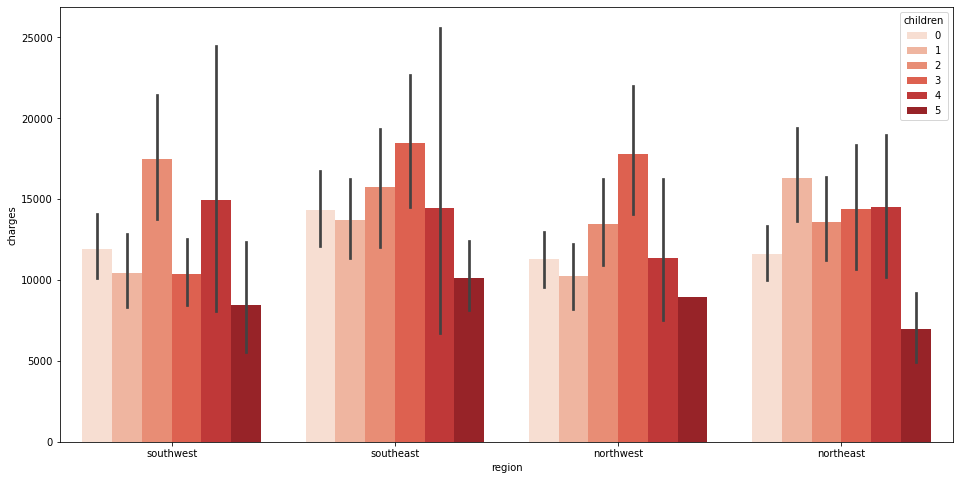

In [14]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Reds')
plt.show()

From the above graphs we can say that the highest charges are still in Southeast. People in Southeast smoke more than people in Northeast, but people in Northeast have higher charges by gender than in Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

In [15]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Converting category labels into numerical using LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

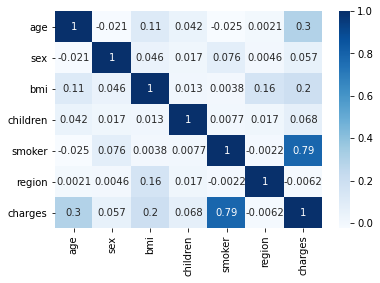

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

No correlation, except with smoking, smoling is highly related with 0.79 correrlation

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [19]:
df["region"].unique()

array([3, 2, 1, 0])

# Multiple Linear Regression

In [20]:
X = df[["age","smoker","bmi","sex","children","region"]] # Independent variables
y = df["charges"]   # Dependent variable

In [21]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
X.shape , y.shape

((1338, 6), (1338,))

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [24]:
#considering multiple factors we will go with multiple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
#predicting model
y_pred = model.predict(X_test)

In [27]:
#accuracy of model
accuracy = model.score(X_test,y_test)
print("Accuracy =",accuracy)

Accuracy = 0.7962732059725783


In [29]:
#eXAMPLE 
data = {'age' : 18,
        'sex' : 1,
        'bmi' : 32,
        'children':1,
        'smoker' : 0,
        'region' : 3}
index = [1]
frank_df = pd.DataFrame(data,index)
frank_df
prediction_frank = model.predict(frank_df)
print("Medical Insurance cost for Frank is : ",prediction_frank)

Medical Insurance cost for Frank is :  [26162.79315547]


# Random Forest Regressor

In [30]:
#trying with random forest model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor as rfr
clf = rfr(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [32]:
accuracy = clf.score(X_test, y_test)
print("Accuracy =", accuracy)

Accuracy = 0.860420740052162


In [33]:
data = {'age' : 18,
        'sex' : 1,
        'bmi' : 32,
        'children':1,
        'smoker' : 0,
        'region' : 3}
index = [1]
frank_df = pd.DataFrame(data,index)
frank_df
prediction_frank = clf.predict(frank_df)
print("Medical Insurance cost for Frank is : ",prediction_frank)

Medical Insurance cost for Frank is :  [34977.988711]


# Decision Tree Regressor

In [34]:
from sklearn import tree

In [35]:
regtree = tree.DecisionTreeRegressor()

In [36]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
y_train_pred = regtree.predict(X_train)

In [38]:
y_test_pred = regtree.predict(X_test)

In [39]:
accuracy = regtree.score(X_test, y_test)
print("Accuracy =", accuracy)

Accuracy = 0.6653239801458128


In [40]:
accuracy = model.score(X_test,y_test)
print("Accuracy of Multiple Regression  =",accuracy)

accuracy = clf.score(X_test, y_test)
print("Accuracy of  Random Forest =", accuracy)

accuracy = regtree.score(X_test, y_test)
print("Accuracy of Decision Tree =", accuracy)

Accuracy of Multiple Regression  = 0.7962732059725783
Accuracy of  Random Forest = 0.860420740052162
Accuracy of Decision Tree = 0.6653239801458128


From above all 3 model we conclude that Best accurate model is Random Forest Model

In [46]:
age = int(input("Enter your Age ="))
sex = int(input("Enter your gender 0 for female and 1 for male ="))
bmi = int(input("Enter your body mass index ="))
children = int(input("Enter no of children you have ="))
smoker = int(input("Enter whether you are smoker or not enter 1 if yes or 0 if not ="))
region = int(input("Enter the region you live 1 for Northwest, 2 for Southeast, 3 for Southwest, 4 for Northeast ="))
def Model(age,bmi,sex,children,smoker,region):
    data = {'age' : 18,
        'sex' : 1,
        'bmi' : 32,
        'children':1,
        'smoker' : 0,
        'region' : 3}
    index = [1]
    frank_df = pd.DataFrame(data,index)
    frank_df
    prediction_frank = clf.predict(frank_df)
    print("Medical Insurance cost for person is : ",prediction_frank)
Model(age,bmi,sex,children,smoker,region)

Enter your Age =21
Enter your gender 0 for female and 1 for male =1
Enter your body mass index =24
Enter no of children you have =0
Enter whether you are smoker or not enter 1 if yes or 0 if not =0
Enter the region you live 1 for Northwest, 2 for Southeast, 3 for Southwest, 4 for Northeast =1
Medical Insurance cost for person is :  [34977.988711]
